In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

!unzip drive/"My Drive"/korat_sauce/all_sauce3.zip

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import cv2
import os
import imutils

from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score ,accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from os import listdir
from os.path import isfile, join
import tensorflow

In [3]:
rawImages = []
labels = []

In [4]:
mypath = 'all_sauce/'
imagePaths = [mypath+f for f in listdir(mypath) if isfile(join(mypath, f))]

In [5]:
batch_size = 32
num_classes = 4
epochs = 13
data_augmentation = True
num_predictions = 20
width = 150
height = 150
#images = np.empty((0, 150,150,3))
labels = []
rawImage = []

In [6]:
except_pic =[]
for i in range(217,240):
   except_pic.append("all_sauce/ocean."+str(i)+".jpg")
for i in range(454,477):
   except_pic.append("all_sauce/ocean."+str(i)+".jpg")

In [7]:
count_pass = 0
for (i, imagePath) in enumerate(imagePaths):
    if(imagePath in except_pic):
      count_pass +=1
      continue
    image = cv2.imread(imagePath)
    if(len(image[0])>len(image[0][0])):
      image = np.rot90(image)
    label = imagePath.split('/')[1].split('.')[0]
    image = cv2.resize(image, (width,height))
    
    #images = np.append(images, [image], axis=0)
    labels.append(label)
    rawImage.append(image)
    
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))
print("pass = ",count_pass)

[INFO] processed 1000/3968
[INFO] processed 2000/3968
[INFO] processed 3000/3968
pass =  46


In [8]:
images_array = np.array(rawImage)
images_array.shape

(3922, 150, 150, 3)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images_array, np.array(labels), test_size=0.2,random_state=1)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_test)

y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

In [14]:

model.compile(loss="binary_crossentropy",
              optimizer= "rmsprop",
              metrics=["accuracy"])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [15]:
seq_model = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_val, y_val),
              shuffle=True)

Epoch 1/13
74/74 [==============================] - 353s 5s/step - loss: 0.6221 - accuracy: 0.4409 - val_loss: 0.3837 - val_accuracy: 0.7006
Epoch 2/13
74/74 [==============================] - 353s 5s/step - loss: 0.3652 - accuracy: 0.6998 - val_loss: 0.2694 - val_accuracy: 0.7911
Epoch 3/13
74/74 [==============================] - 353s 5s/step - loss: 0.2902 - accuracy: 0.7866 - val_loss: 0.2258 - val_accuracy: 0.8229
Epoch 4/13
74/74 [==============================] - 351s 5s/step - loss: 0.2395 - accuracy: 0.8176 - val_loss: 0.1475 - val_accuracy: 0.8752
Epoch 5/13
74/74 [==============================] - 352s 5s/step - loss: 0.1826 - accuracy: 0.8724 - val_loss: 0.1245 - val_accuracy: 0.8892
Epoch 6/13
74/74 [==============================] - 351s 5s/step - loss: 0.1827 - accuracy: 0.8814 - val_loss: 0.1804 - val_accuracy: 0.8701
Epoch 7/13
74/74 [==============================] - 352s 5s/step - loss: 0.1402 - accuracy: 0.9069 - val_loss: 0.0894 - val_accuracy: 0.9350
Epoch 8/13
74

In [16]:
value = model.predict(X_test)
y_pred =np.argmax(value,axis=1)
y_true = np.argmax(y_test,axis=1)

In [17]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       197
           1       0.94      0.93      0.93       205
           2       0.99      0.99      0.99       215
           3       0.98      0.96      0.97       168

    accuracy                           0.95       785
   macro avg       0.95      0.95      0.95       785
weighted avg       0.95      0.95      0.95       785



In [18]:
import pandas as pd
metrics = pd.DataFrame(seq_model.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.622131,0.440901,0.383716,0.700637
1,0.365233,0.699830,0.269410,0.791083
2,0.290193,0.786565,0.225787,0.822930
3,0.239527,0.817602,0.147481,0.875159
4,0.182629,0.872449,0.124503,0.889172
5,0.182664,0.881378,0.180422,0.870064
6,0.140236,0.906888,0.089428,0.935032
7,0.115304,0.924745,0.099204,0.924841
8,0.131536,0.922194,0.103531,0.933758
9,0.074600,0.958759,0.541542,0.794904


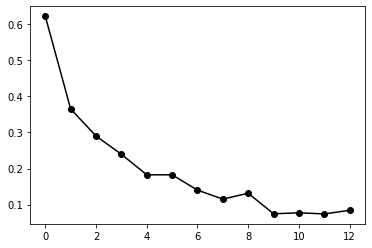

In [19]:
import matplotlib.pyplot as plt
plt.plot(list(seq_model.history.values())[0],'k-o')

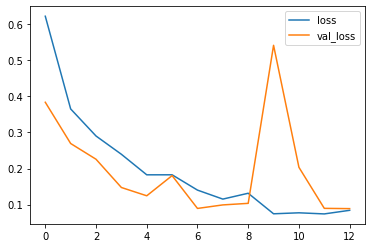

In [20]:
metrics[['loss', 'val_loss']].plot()

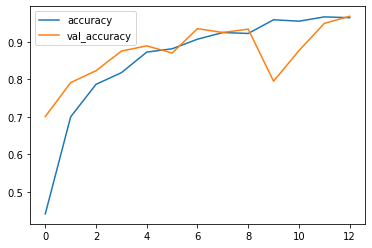

In [21]:
metrics[['accuracy', 'val_accuracy']].plot()

(1, 150, 150, 3)


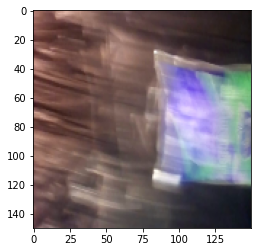

[0.3427834  0.07825583 0.01374468 0.47542596]
0.47542596
[3]


In [22]:
#######
img_path = 'all_sauce/maeyupa.9.jpg'
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np
#img = image.load_img(img_path, target_size=(150, 150))
#img_tensor = image.img_to_array(img)
#img_tensor = np.expand_dims(img_tensor, axis=0)
#img_tensor = img_tensor.astype('float32')
img_list = []
image = cv2.imread(img_path)
image = cv2.resize(image, (width,height))
img_list.append(image)
img_list = np.array(img_list)
img_list = img_list.astype('float32')


# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_list /= 255.
# Its shape is (1, 150, 150, 3)

print(img_list.shape)

plt.imshow(img_list[0])
#plt.imshow(X_test[0])
plt.show()

prediction = model.predict(np.array([img_list[0]]))
#prediction = model.predict(np.array([X_test[0]]))
print(prediction[0])
print(max(prediction[0]))
y_classes = prediction.argmax(axis=-1)
print(y_classes)

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

!unzip drive/"My Drive"/korat_sauce/test_all_sauce3.zip

In [24]:
mypath_test = 'New folder/'
imagePaths_test = [mypath_test+f for f in listdir(mypath_test) if isfile(join(mypath_test, f))]

In [25]:
#######
for (i, img_path) in enumerate(imagePaths_test):
  #img_path = 'all_sauce/ocean.'+str(i)+'.jpg'
  img_list = []
  image = cv2.imread(img_path)
  image = cv2.resize(image, (width,height))
  img_list.append(image)
  img_list = np.array(img_list)
  img_list = img_list.astype('float32')


  # Remember that the model was trained on inputs
  # that were preprocessed in the following way:
  img_list /= 255.
  # Its shape is (1, 150, 150, 3)

  print(img_list.shape)
  print(img_path)

  #plt.imshow(img_list[0])
  #plt.imshow(X_test[0])
  #plt.show()

  prediction = model.predict(np.array([img_list[0]]))
  #prediction = model.predict(np.array([X_test[0]]))
  print(prediction[0])
  print(max(prediction[0]))
  y_classes = prediction.argmax(axis=-1)
  print(y_classes)
  print("#####")

(1, 150, 150, 3)
New folder/all.2392.ocean.jpg
[2.8893914e-09 7.9278992e-09 4.0559958e-11 9.9995381e-01]
0.9999538
[3]
#####
(1, 150, 150, 3)
New folder/all.488.zapnuerchick.jpg
[2.2730231e-04 1.0261593e-05 6.4956066e-06 9.9720609e-01]
0.9972061
[3]
#####
(1, 150, 150, 3)
New folder/all.868.zapnuerchick.jpg
[3.6793947e-04 7.4273506e-05 2.8753281e-04 9.9236476e-01]
0.99236476
[3]
#####
(1, 150, 150, 3)
New folder/all.788.zapnuer.jpg
[0.10285744 0.03140736 0.60755306 0.59230196]
0.60755306
[2]
#####
(1, 150, 150, 3)
New folder/all.200.zapnuerchick.jpg
[1.5667975e-03 3.3912063e-04 1.5988946e-04 9.8652714e-01]
0.98652714
[3]
#####
(1, 150, 150, 3)
New folder/all.2572.maeyupa.jpg
[5.2551906e-05 8.5903409e-08 1.8586941e-13 8.2819104e-01]
0.82819104
[3]
#####
(1, 150, 150, 3)
New folder/all.1263.zapnuerchick.jpg
[4.3306321e-02 3.0929903e-05 9.4130883e-05 9.1145205e-01]
0.91145205
[3]
#####
(1, 150, 150, 3)
New folder/all.1644.zapnuer.jpg
[4.3626722e-05 4.2882577e-05 9.1849554e-01 2.9269624e-0

In [26]:
model.save_weights("train_sauce.h5")